#METHODS OF PREDICTION

#Problem Statement - Predicting stock price with RNN using historical data of multiple companies to help in decision-making for people interested in investment.

Importance - With the help of accurate stock price prediction, many professions like fund manager, can gain huge financial gains. Additioanlly, it is high useful for the people who are intrested in dealing in stock market.

Importing Libraries 
-
I have used the following libraries in my notebook:

In [357]:
import numpy as num
import pandas as pan 
import matplotlib.pyplot as mat

import math as ma
import random as random
import datetime 
import matplotlib.dates as mdat
from mplfinance.original_flavor import candlestick_ohlc
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#DATA COLLECTION

The data has been collected from kaggle.

Added the code parse_date=['Date'] to make sure that the date column will be treated as datetime.

In [358]:
df = pan.read_csv('/Users/apple/Downloads/Stock_prices.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA


Also, I would also like to add this part as it would be more helpful to understand more about the dataset.

- Date: It refers to the date on which the mentioned columns are being recorded.
- Open: when the market opens, the price it has is the opening price.
- Close: when the market closes, the price it has is the closing price.
- High: This is the most valued stock price during the recorded day.
- Low: This is the least valued stock price during the recorded day.
- AdjClose: Ending stock value after the company's action are accounted for.
- Volume: Refers to the total number of shares that were traded the particular day.

In [359]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
28559,2023-03-31,19.125000,19.195000,18.860001,18.910,18.910,930746.0,FR.PA
28560,2023-04-03,18.940001,19.325001,18.820000,19.070,19.070,819094.0,FR.PA
28561,2023-04-04,19.170000,19.309999,18.775000,18.775,18.775,931876.0,FR.PA
28562,2023-04-05,18.785000,18.799999,17.815001,18.125,18.125,1518496.0,FR.PA
28563,2023-04-06,18.174999,18.385000,18.129999,18.250,18.250,737501.0,FR.PA


In [360]:
df.shape

(28564, 8)

Here, the stock prices of 37 companies are given from 2020 to 2023.
(For this notebook, predicting future stock prices of one random company)

In [361]:
companies = df['Stock'].unique()
print(companies)

['AC.PA' 'AI.PA' 'AIR.PA' 'ALO.PA' 'CS.PA' 'BN.PA' 'EN.PA' 'CAP.PA'
 'CA.PA' 'ACA.PA' 'BNP.PA' 'ENGI.PA' 'EL.PA' 'RMS.PA' 'OR.PA' 'LR.PA'
 'MC.PA' 'ML.PA' 'ORA.PA' 'RI.PA' 'PUB.PA' 'RNO.PA' 'SAF.PA' 'SGO.PA'
 'SAN.PA' 'SU.PA' 'GLE.PA' 'SW.PA' 'STM.PA' 'HO.PA' 'ATO.PA' 'VIE.PA'
 'DG.PA' 'VIV.PA' 'WLN.PA' 'KER.PA' 'FR.PA']


Name of all the companies: (Note that PA means price action which includes all the components of stock price)

AC - Accor 
AI - Air Liquide 
AIR - Airbus 
ALO - Alstom 
CS - AXA 
BN - Danone 
EN - Bouygues 
CAP - Capgemini 
CA - Carrefour 
ACA - Crédit Agricole 
BNP - BNP Paribas 
ENGI - Engie 
EL - EssilorLuxottica 
RMS - Hermès International 
OR - L'Oréal 
LR - Legrand 
MC - LVMH Moët Hennessy Louis Vuitton 
ML - Michelin 
ORA - Orange 
RI - Pernod Ricard 
PUB - Publicis Groupe 
RNO - Renault 
SAF - Safran 
SGO - Saint-Gobain 
SAN - Sanofi 
SU - Schneider Electric 
GLE - Société Générale 
SW - Sodexo 
STM - STMicroelectronics 
HO - Thales 
ATO - Atos 
VIE - Veolia Environnement 
DG - Vinci 
VIV - Vivendi 
WLN - Worldline 
KER - Kering 
FR - Vallourec 

In [362]:
total_companies = df['Stock'].value_counts()
print(total_companies)

Stock
AC.PA      772
RI.PA      772
RNO.PA     772
SAF.PA     772
SGO.PA     772
SAN.PA     772
SU.PA      772
GLE.PA     772
SW.PA      772
STM.PA     772
HO.PA      772
ATO.PA     772
VIE.PA     772
DG.PA      772
VIV.PA     772
WLN.PA     772
KER.PA     772
PUB.PA     772
ORA.PA     772
AI.PA      772
ML.PA      772
AIR.PA     772
ALO.PA     772
CS.PA      772
BN.PA      772
EN.PA      772
CAP.PA     772
CA.PA      772
ACA.PA     772
BNP.PA     772
ENGI.PA    772
EL.PA      772
RMS.PA     772
OR.PA      772
LR.PA      772
MC.PA      772
FR.PA      772
Name: count, dtype: int64


#DATA PRE PROCESSING

In [363]:
def company_data(company, start, end):
    company1 = df[df['Stock'] == company]
    date_filter = company1[(company1['Date'] > start) & (company1['Date'] < end)]
    return date_filter

In [364]:
company_name = ran.choice(df['Stock'].unique().tolist())

start=dat.datetime(2020,4,8)
end=dat.datetime(2023,4,6)

ds = company_data(company_name, start_date, end_date)

In the above code, the stock prices of one random company has been selected. 
The start and end dates have also been defined.

Then created a separate data frame, ds, for storing data of that particular company.

In [365]:
ds.shape

(770, 8)

In [366]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
23161,2020-04-09,61.660000,63.139999,60.660000,61.880001,60.859253,344903.0,ATO.PA
23162,2020-04-14,63.320000,63.480000,61.180000,61.180000,60.170799,320385.0,ATO.PA
23163,2020-04-15,61.599998,61.599998,58.299999,58.500000,57.535007,518651.0,ATO.PA
23164,2020-04-16,59.599998,60.580002,59.279999,60.340000,59.344658,433626.0,ATO.PA
23165,2020-04-17,61.900002,64.459999,61.900002,64.320000,63.259003,568279.0,ATO.PA


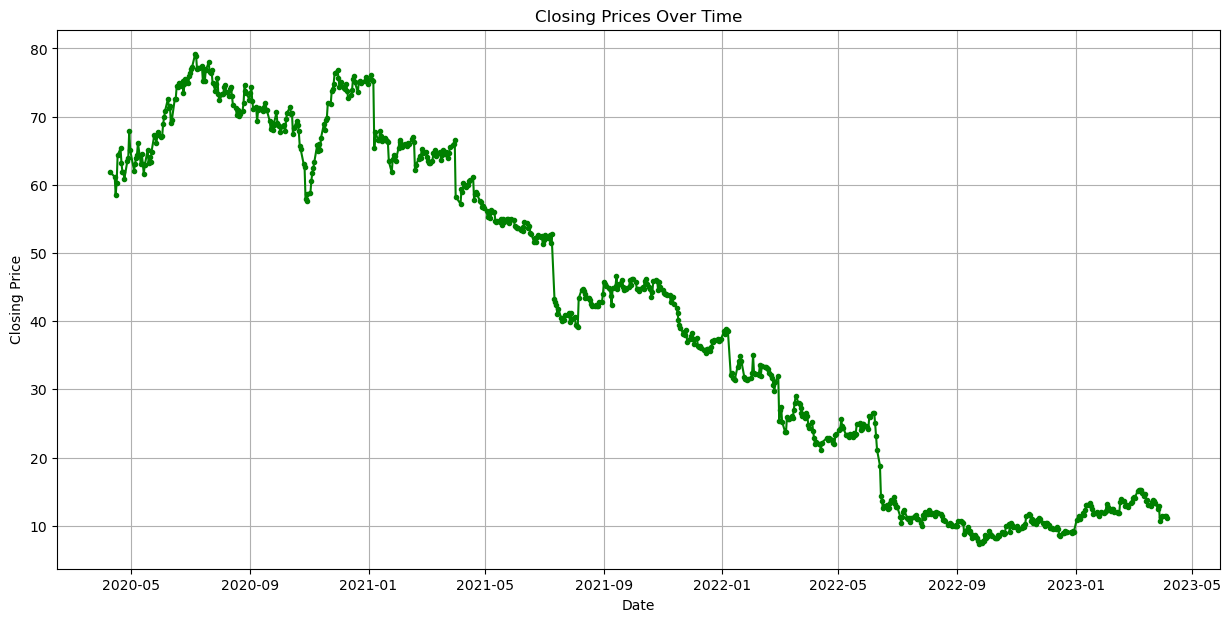

In [367]:
ds['Date'] = pan.to_datetime(ds['Date'])

mat.figure(figsize=(15, 7))
mat.plot(ds['Date'], ds['Close'], marker='.', color='green')
mat.title('Closing Prices Over Time')
mat.xlabel('Date')
mat.ylabel('Closing Price')
mat.grid(True)
mat.show()

Above, first converted the date column to datetime, and then visualized the stock prices of the company over the different month in the last three years.

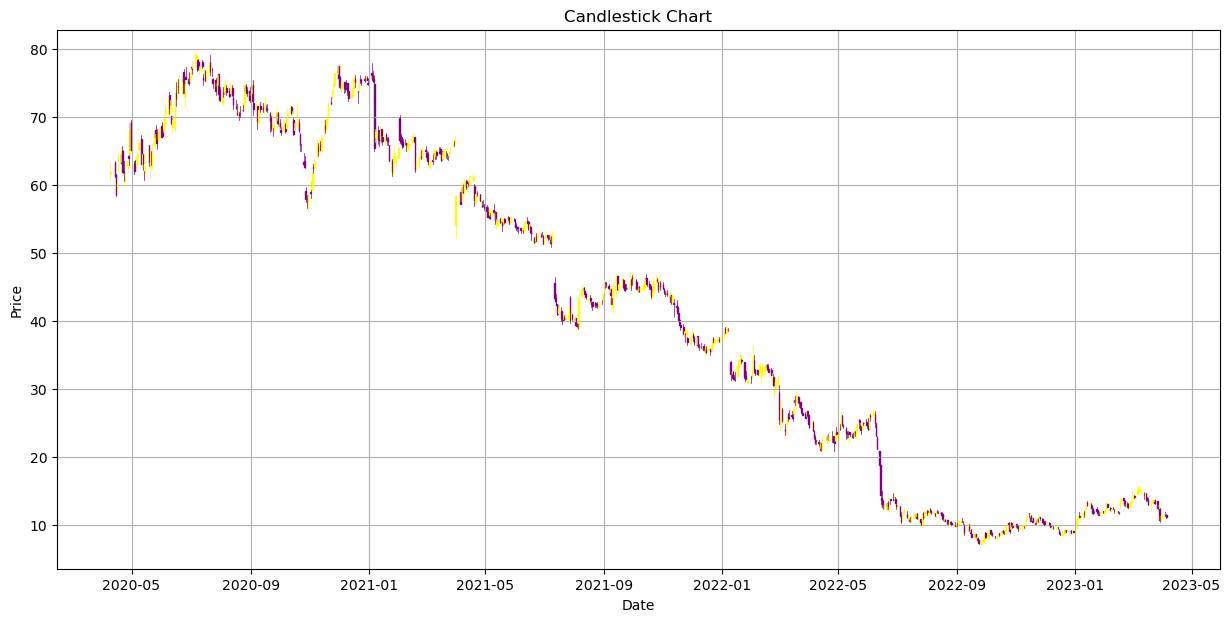

In [368]:
mat_date = mdat.date2num(ds['Date'])

elements = num.vstack((mat_date, ds['Open'], ds['High'], ds['Low'], ds['Close'], ds['Adj Close'], ds['Volume'])).T

mat.figure(figsize=(15, 7))
ax = mat.subplot()
candlestick_ohlc(ax, elements, width=0.7, colorup='yellow', colordown='purple')
ax.xaxis_date()
mat.title('Candlestick Chart')
mat.xlabel('Date')
mat.ylabel('Price')
mat.grid(True)
mat.show()

In the above code, have used candlestick chart, which creates a better visualization for such a dataset for multiple elements.

First the date column is converted into something the matplot library can use.

Then with elements, a tuple for each column of the dataset is created. (Open, high, low, close, adj low, volume)

Yellow is for days where close is higher than low. And vice versa for the color purple.

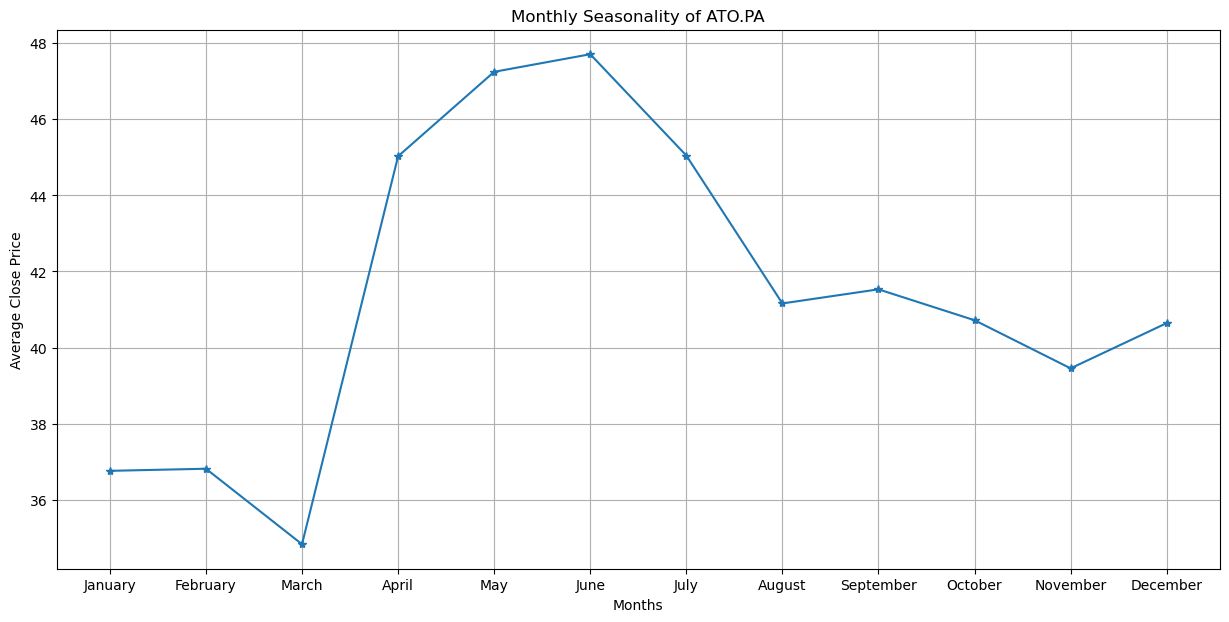

In [369]:
ds['Month'] = ds['Date'].dt.month

monthwise= ds.groupby('Month')['Close'].mean()

mat.figure(figsize=(15, 7))
mat.plot(monthwise.index, monthwise.values, marker='*')
mat.title(f'Monthly Seasonality of {company_name}')
mat.xlabel('Months')
mat.ylabel('Average Close Price')
mat.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
mat.grid(True)
mat.show()

Now,a new column ha been created month in the dataset. This is done to get the month from the dataset, as want to show the average close time of the choosen company

In [370]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Month
23161,2020-04-09,61.660000,63.139999,60.660000,61.880001,60.859253,344903.0,ATO.PA,4
23162,2020-04-14,63.320000,63.480000,61.180000,61.180000,60.170799,320385.0,ATO.PA,4
23163,2020-04-15,61.599998,61.599998,58.299999,58.500000,57.535007,518651.0,ATO.PA,4
23164,2020-04-16,59.599998,60.580002,59.279999,60.340000,59.344658,433626.0,ATO.PA,4
23165,2020-04-17,61.900002,64.459999,61.900002,64.320000,63.259003,568279.0,ATO.PA,4


In [371]:
ds.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Month
23926,2023-03-30,10.675,11.300,10.600,11.290,11.290,2187587.0,ATO.PA,3
23927,2023-03-31,11.280,11.410,10.945,11.390,11.390,934322.0,ATO.PA,3
23928,2023-04-03,11.440,11.600,11.300,11.495,11.495,784821.0,ATO.PA,4
23929,2023-04-04,11.505,11.835,11.360,11.495,11.495,1035704.0,ATO.PA,4
23930,2023-04-05,11.400,11.585,11.085,11.180,11.180,871226.0,ATO.PA,4


Below, data will be splitted into train and test.

In [372]:
new_ds = ds.reset_index()['Close']

Here, the index of the dataset has been reset and created a new_ds which I will be using further for model training as well. As, the prediction will be based on the closing rate.

In [373]:
new_ds

0      61.880001
1      61.180000
2      58.500000
3      60.340000
4      64.320000
         ...    
765    11.290000
766    11.390000
767    11.495000
768    11.495000
769    11.180000
Name: Close, Length: 770, dtype: float64

In [374]:
scaler = MinMaxScaler()
scaled=scaler.fit_transform(num.array(new_ds).reshape(-1,1))

Here, scaling of data has been dones. Now the minimum value of the feature will be 0, and the maximum will be 1.

In [375]:
train_size = int(len(scaled) * 0.7)  
train_data, test_data = scaled[:train_size], scaled[train_size:]

Above, divided the scaled data into 70% for training and 30% for testing.

This dataset has 770 entries, so accordindly I have chosen the percentage.

In [376]:
past_data = 90

X_train, y_train = [], []
for i in range(past_data, len(train_data)):
    X_train.append(train_data[i - past_data:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = num.array(X_train), num.array(y_train)

X_test, y_test = [], []
for i in range(past_data, len(test_data)):
    X_test.append(test_data[i - past_data:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = num.array(X_test), num.array(y_test)

The past time has been set to 90 so that the previous 90 steps will be used to predict the next ones. 

Additionally, have prepared sequence for the LSTM model and same for the test set to ensure that the train data receives the historial data to predict the future prices.

In [377]:
print(X_train.shape), print(y_train.shape)

(449, 90)
(449,)


(None, None)

In [378]:
print(X_test.shape), print(y_test.shape)

(141, 90)
(141,)


(None, None)

In [379]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Now, the data has been reshaped, so as to be used in LSTM. (samples, time stamps, features)

#EXPERIMENTS

In the following code, 10 different paramteres are being assigned. And will be using the paramteres of the best one as the final one.

The configuration that causes the least test loss will be the best paramters for my model.

In [381]:
hypertunning_paramteres = [
    {'units': 50, 'dropout': 0.2, 'epochs': 50},
    {'units': 100, 'dropout': 0.3, 'epochs': 50},
    {'units': 50, 'dropout': 0.2, 'epochs': 100},
    {'units': 150, 'dropout': 0.2, 'epochs': 50},
    {'units': 150, 'dropout': 0.3, 'epochs': 100},
    {'units': 50, 'dropout': 0.2, 'epochs': 100},
    {'units': 150, 'dropout': 0.1, 'epochs': 100},
    {'units': 50, 'dropout': 0.1, 'epochs': 100},
    {'units': 200, 'dropout': 0.2, 'epochs': 100},
    {'units': 200, 'dropout': 0.1, 'epochs': 100},
]

In [382]:
experiment_results = []

In [383]:
def experimental_model(units, dropout, epochs):
    model_exp = Sequential()
    model_exp.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_exp.add(Dropout(dropout))
    model_exp.add(LSTM(units=units, return_sequences=True))
    model_exp.add(Dropout(dropout))
    model_exp.add(LSTM(units=units))
    model_exp.add(Dropout(dropout))
    model_exp.add(Dense(units=1))

    model_exp.compile(optimizer='adam', loss='mean_squared_error')

    history = model_exp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0)

    train_loss = model_exp.evaluate(X_train, y_train, verbose=0)
    test_loss = model_exp.evaluate(X_test, y_test, verbose=0)
    
    return history, train_loss, test_loss

In [384]:
for parameters in hypertunning_paramteres:
    units = parameters['units']
    dropout = parameters['dropout']
    epochs = parameters['epochs']
    
    history, train_loss, test_loss = experimental_model(units, dropout, epochs)
    
    experiment_results.append({
        'Units': units,
        'Dropout': dropout,
        'Epochs': epochs,
        'Train_loss': train_loss,
        'Test_loss': test_loss,
    })

for i, result in enumerate(experiment_results):
    print(f"Configuration {i+1}: Units={result['Units']}, Dropout={result['Dropout']}, Epochs={result['Epochs']}")
    print(f"  Train Loss: {result['Train_loss']:.4f}, Test Loss: {result['Test_loss']:.4f}")

Configuration 1: Units=50, Dropout=0.2, Epochs=50
  Train Loss: 0.0016, Test Loss: 0.0007
Configuration 2: Units=100, Dropout=0.3, Epochs=50
  Train Loss: 0.0017, Test Loss: 0.0034
Configuration 3: Units=50, Dropout=0.2, Epochs=100
  Train Loss: 0.0012, Test Loss: 0.0007
Configuration 4: Units=150, Dropout=0.2, Epochs=50
  Train Loss: 0.0012, Test Loss: 0.0011
Configuration 5: Units=150, Dropout=0.3, Epochs=100
  Train Loss: 0.0009, Test Loss: 0.0008
Configuration 6: Units=50, Dropout=0.2, Epochs=100
  Train Loss: 0.0012, Test Loss: 0.0008
Configuration 7: Units=150, Dropout=0.1, Epochs=100
  Train Loss: 0.0007, Test Loss: 0.0013
Configuration 8: Units=50, Dropout=0.1, Epochs=100
  Train Loss: 0.0012, Test Loss: 0.0005
Configuration 9: Units=200, Dropout=0.2, Epochs=100
  Train Loss: 0.0008, Test Loss: 0.0001
Configuration 10: Units=200, Dropout=0.1, Epochs=100
  Train Loss: 0.0012, Test Loss: 0.0005


So, the following are the results of different parameters.

As you can clearly see that the loss function of configuration 9 is the lowest. So, will be proceeding with the same configurations to predict the next 15 days of stock prices.

My understanding of the experiment:

- For Units, higher value allows the model to learn more difficult data.
- For dropout, it helps to drop some values during the training so that the model can learn a bit out of the box as well.
- For epochs, the importance is that they allow the model to increase the learning capacity.

Our best configuration is where units are 200 meaning our data is learning more complex data. Here, 20% of noise has also been added through dropout. And a high value of epoch is being used as well.


#TRAINING THE MODEL (the below coding has been done with the best model)

In [388]:
model_config9 = Sequential()

model_config9.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_config9.add(Dropout(0.2))       

model_config9.add(LSTM(units=200, return_sequences=True))
model_config9.add(Dropout(0.2))

model_config9.add(LSTM(units=200))
model_config9.add(Dropout(0.2))

model_config9.add(Dense(units=1))

Now, in the above code have added three layers of LSTM with 200 neurons each with a dropout value of 20%. 
(also, the dropout value has been randomly selected, and then chosen after the experiment)

The lstm layer helps in long term dependencies which are important in a time series like the one being used in this notebook.

In [389]:
model_config9.summary()

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_213 (LSTM)                 │ (None, 90, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_204 (Dropout)           │ (None, 90, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_214 (LSTM)                 │ (None, 90, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_205 (Dropout)           │ (None, 90, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_215 (LSTM)                 │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_206 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,401 (3.06 MB)

 Trainable params: 803,401 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

The above code gives information about the architecture of the model:

It shows the total possible parameters to be trained are 803,401 out of which all are trainable. 

In [390]:
model_config9.compile(loss='mean_squared_error',optimizer='adam')

Mean squared error calculates the loss.

And adam is used as an way to minimize loss.

In [ ]:
config9_cp = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model_config9.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [config9_cp, early_stop])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - loss: 0.0998 - val_loss: 0.0067
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0057 - val_loss: 4.9219e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0130 - val_loss: 0.0031
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - loss: 0.0092 - val_loss: 3.2824e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - loss: 0.0058 - val_loss: 4.8662e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - loss: 0.0043 - val_loss: 7.9401e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 0.0028 - val_loss: 7.8056e-04
Epoch 12/100
15/15 ━━

With the model checkpoints, I am saving the model's weight to a file called my_weight to ensure the loss is recorded and we ultimately use the best possible model.

I have defined the early stop as 20, which means that if the validation loss doesn't improve after 20 epochs then the training must be stopped. (this helped me save time and also helpful in limited computation power) (I choose 20 epochs randomly)

In the rest of the code, the model is being trained for 100 epochs.

In [307]:
trainpredict=model_config7.predict(X_train)
testpredict=model_config7.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [308]:
trainpredict=scaler.inverse_transform(trainpredict)
testpredict=scaler.inverse_transform(testpredict)

During the start of model training, the train and test were scaled to a value of 0 to 1. Now, I have just simply reversed that action as I want to make the predictions based on the original values.

In [311]:
print(ma.sqrt(mean_squared_error(y_train,trainpredict)))

50.59631410157279


In [312]:
print(ma.sqrt(mean_squared_error(y_test,testpredict)))

54.17089772060654


The closeness of mean_squared_error of these two figures depicts about the model, which in this case is pretty close which indicates that the model has been able to adapt to the pattern of the time series.

#PREDICTION AND VISUALIZATION

In [313]:
previous = 90

In this code, the prediction will be based on looking back at 90 previous steps.

In [320]:
trainPredictgraph = num.empty_like(new_ds)
trainPredictgraph[:] = num.nan

trainPredictgraph[previous:len(trainpredict)+previous] = trainpredict.flatten()

In the above code, an array has been been created which will store the prediction based on the content of new_ds which will further be used for ploting on the graph.

Then with the last line of code, the predicted values are being assigned to the correct locations for train prediction.

In [321]:
testPredictgraph = num.empty_like(new_ds)
testPredictgraph[:] = num.nan

start = len(new_ds) - len(testpredict)

testPredictgraph[start:] = testpredict.flatten()

The similar step has been done to the test data as well, additionally the code has been assigned in a way that it aligns with the time series. 

In [324]:
originaldata = scaler.inverse_transform(scaled)

With the above code, reversed the scaling back to it's original form as predictions will be done on the original data.

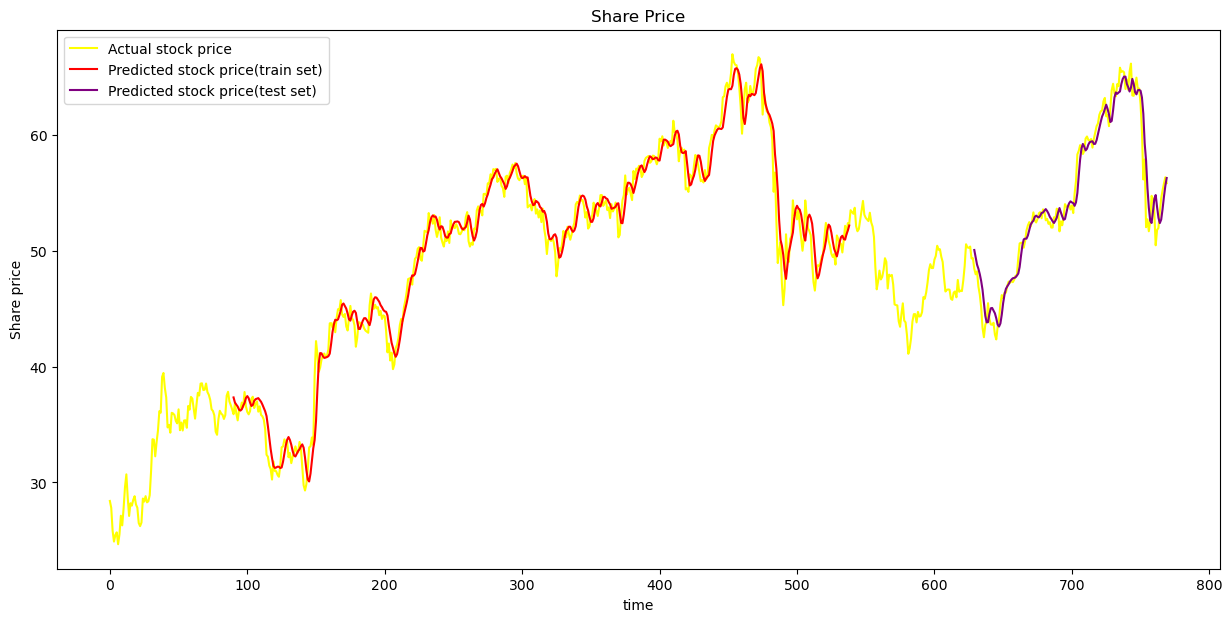

In [328]:
mat.figure(figsize=(15, 7))
mat.plot(originaldata, color='yellow', label=f"Actual stock price")
mat.plot(trainPredictgraph, color='red', label=f"Predicted stock price(train set)")
mat.plot(testPredictgraph, color='purple', label=f"Predicted stock price(test set)")

mat.title("Share Price")
mat.xlabel("time")
mat.ylabel("Share price")
mat.legend()
mat.show()

About Above graph, three different prices are shown with each color. The true stock price, the stock price that got predicted under train and test set.

This graph shows the performance of the model, and it can be seen that the training line and the testing line is very close to the yellow ones which means the trained model is creating very accurate predictions.

In [335]:
prediction = X_test[-1]

prediction = prediction.reshape(1, n_past, 1)

predictions15days = []
for _ in range(15):
    dayprediction = model_config7.predict(prediction)
    predictions15days.append(dayprediction[0, 0])  
    prediction = num.roll(prediction, -1, axis=1) 
    prediction[0, -1, 0] = dayprediction  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [336]:
predictions15days = scaler.inverse_transform(num.array(predictions15days).reshape(-1, 1))

This inverse scaling has been done to ensure that the prediction is based on the actual number and not the ones scaled from 0 to 1.

In [338]:
for i, pre in enumerate(predictions15days, start=1):
    print(f"Day {i}: Prediction= {pre[0]}")

Day 1: Prediction= 56.2780876159668
Day 2: Prediction= 56.59349060058594
Day 3: Prediction= 56.72268295288086
Day 4: Prediction= 56.76616668701172
Day 5: Prediction= 56.76894760131836
Day 6: Prediction= 56.75387954711914
Day 7: Prediction= 56.73529052734375
Day 8: Prediction= 56.722740173339844
Day 9: Prediction= 56.721954345703125
Day 10: Prediction= 56.735538482666016
Day 11: Prediction= 56.763641357421875
Day 12: Prediction= 56.804710388183594
Day 13: Prediction= 56.85628128051758
Day 14: Prediction= 56.91538619995117
Day 15: Prediction= 56.979164123535156


Now, the prices of the next 15 days has been predicted.

In the below code, the predicted data has been beautifully displayed for better understanding.

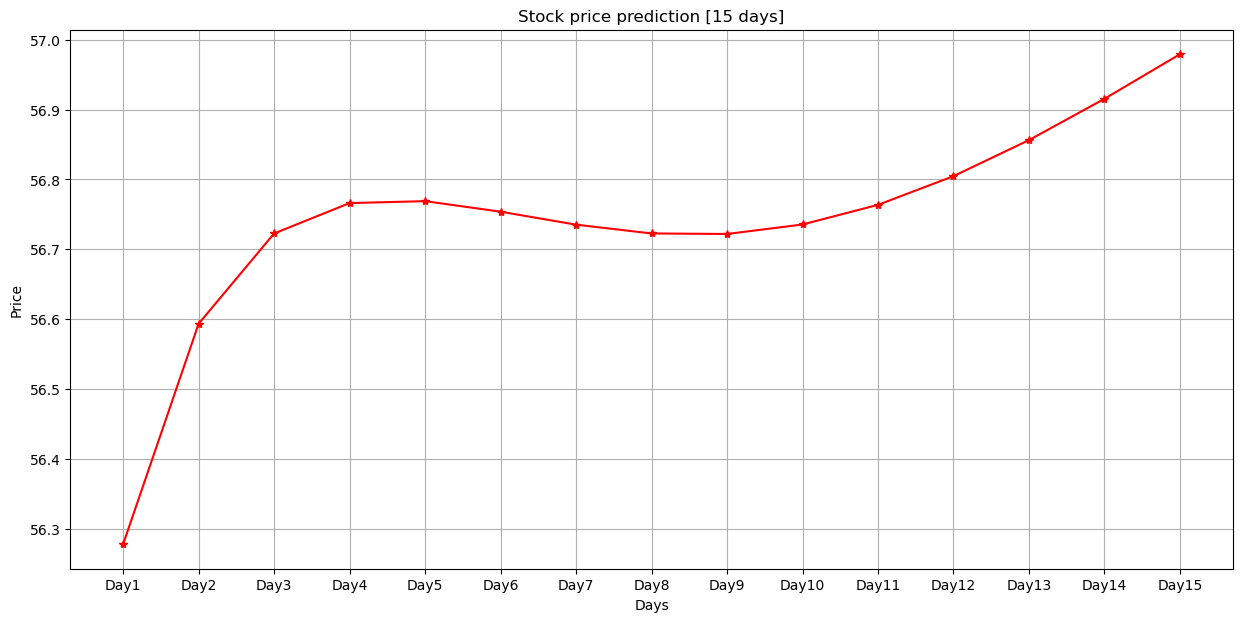

In [342]:
mat.figure(figsize=(15, 7))
mat.plot(predictions15days, marker='*', color='red')
mat.title('Stock price prediction [15 days]')
mat.xlabel('Days')
mat.ylabel('Price')
mat.xticks(range(0, 15), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']) #here the number means the days
mat.grid(True)
mat.show()

#FINAL DISCUSSION AND CONCLUSION

What have I learnt from this whole notebook -

- I had a surface level theoritical knowldge of RNN, but through this assignment I have learnt so much more and have had the chance to practical use LSTM. Which honestly has been very fun, as well as very knowledagable.
- I have also been able to gain more knowledge of stock market, as I spent a lot of time trying to understand the keywords under the same and how it matters.
- With the experiment section, I have learned how much different parameters can affect the final model output.

I would like to talk about my understanding of the algorithm I have chosen - 

- RNN (Recurrent Neural Network) is used to create sequences.
- LSTM (Long-Short Term Memory) comes that comes under RNN, it is specialized in handing time series data. It works by learning the pattern that is formed over the time. Which is why it is ideally used in time series such as weather prediction, housing price prediction,and more.

Strengths of this notebook -

- I belive i have been able to create a structed and easy flowing notebook, which enables the easiness to read.
- I also belive that this could be helpful for someone who is actually trying to get into stock price prediction, which just a little bit of machine learning knowledge can make greate use of it.

- Another strength is that this notebook can be run again and again, enabling the random function to use different companies each time. And with minor changes more experiments can be done as well as prediction can be done for more or less days.

Limitations -

- I believe that with more computational power, I could have created a much more informative notebook. I have done prediction of just one company from the 37 companies. It was a tough task to run the 10 experiments on just one company, as it took over 1 hour and also resulted in my laptop getting a bit overheated.


Overall, I believe with this assessment my knowledge of Neural networks has increased significantly. Also, it has reminded me the importance of constantly studying and expanding my knowledge base in the same field as well.

I am also very happy that I chose this very dataset as it helped me learn so much about stock market, which is another amazing field.

With such algorithms, companies and individuals can understand the ways of the stock market. They can use it to their benefit at both individual levels and corporate level.

Also can be used to avoid any major losses in the future, and enable faster and information decision making.

#THANK YOU